In [1]:
import json
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from string import punctuation,digits
import re
from keras.utils import to_categorical
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.layers import Embedding
# from keras.utils.np_utils import probas_to_classes
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib import rcParams
from random import shuffle
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

from gensim.models import KeyedVectors
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
seed = 7
np.random.seed(seed)

In [3]:
df=pd.read_csv("/content/customer_review_train.csv",encoding='utf8')
df.head()

,id,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2
0,1,"['Tally supports export to CSV, GST tax calcul...",['functionality'],['security'],[''],1,1.0,NaN
1,2,['Can create account for multiple companies an...,['financial management'],['functionality'],[''],1,1.0,NaN
2,3,['Tally this software is very user friendly an...,['ease of use'],['backup'],[''],1,1.0,NaN
3,4,"['Doesnt have automatic backups,, would be goo...",['backup'],[''],[''],0,NaN,NaN
4,5,['Auto updation of profit loss and balance she...,['auto update'],['ease of use'],[''],1,1.0,NaN


In [0]:
df['ac']=df['aspect category'].map(lambda x: "['other']" if x == "['none']" else x)
df['ac']=df['ac'].map(lambda x: "['storage/backup']" if x in ["['storage']", "['backup']" ] else x)
df['ac']=df['ac'].map(lambda x: "['update/security']" if x in ["['auto update']", "['security']", "['update']" ] else x)
df['ac']=df['ac'].map(lambda x: "['accounting/finance']" if x in ["['accounting method']", "['financial management']" ] else x)

In [0]:
df['ac1']=df['aspect category1'].map(lambda x: "['other']" if x == "['none']" else x)
df['ac1']=df['ac1'].map(lambda x: "['storage/backup']" if x in ["['storage']", "['backup']" ] else x)
df['ac1']=df['ac1'].map(lambda x: "['update/security']" if x in ["['auto update']", "['security']", "['update']" ] else x)
df['ac1']=df['ac1'].map(lambda x: "['accounting/finance']" if x in ["['accounting method']", "['financial management']" ] else x)

In [6]:
df.head()

,id,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2,ac,ac1
0,1,"['Tally supports export to CSV, GST tax calcul...",['functionality'],['security'],[''],1,1.0,NaN,['functionality'],['update/security']
1,2,['Can create account for multiple companies an...,['financial management'],['functionality'],[''],1,1.0,NaN,['accounting/finance'],['functionality']
2,3,['Tally this software is very user friendly an...,['ease of use'],['backup'],[''],1,1.0,NaN,['ease of use'],['storage/backup']
3,4,"['Doesnt have automatic backups,, would be goo...",['backup'],[''],[''],0,NaN,NaN,['storage/backup'],['']
4,5,['Auto updation of profit loss and balance she...,['auto update'],['ease of use'],[''],1,1.0,NaN,['update/security'],['ease of use']


In [7]:
df['ac'].value_counts()

['ease of use']             358
['accounting/finance']      219
['functionality']           217
['price']                   128
['ui']                      125
['other']                   119
['update/security']         107
['customer support']         75
['storage/backup']           73
['time']                     55
['inventory management']     24
Name: ac, dtype: int64

In [0]:
df['functionality']=df['ac'].map(lambda x: "1" if x=="['functionality']" else "0")
df['ease of use']=df['ac'].map(lambda x1: "1" if x1=="['ease of use']" else "0")
df['accounting/finance']=df['ac'].map(lambda x4: "1" if x4=="['accounting/finance']" else "0")
df['price']=df['ac'].map(lambda x6: "1" if x6=="['price']" else "0")
df['ui']=df['ac'].map(lambda x8: "1" if x8=="['ui']" else "0")
df['other']=df['ac'].map(lambda x10: "1" if x10=="['other']" else "0")
df['update/security']=df['ac'].map(lambda x12: "1" if x12=="['update/security']" else "0")
df['customer support']=df['ac'].map(lambda x14: "1" if x14=="['customer support']" else "0")
df['storage/backup']=df['ac'].map(lambda x16: "1" if x16=="['storage/backup']" else "0")

df['time']=df['ac'].map(lambda x18: "1" if x18=="['time']" else "0")
df['inventory management']=df['ac'].map(lambda x20: "1" if x20=="['inventory management']" else "0")




In [9]:
df.head()


,id,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2,ac,ac1,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,1,"['Tally supports export to CSV, GST tax calcul...",['functionality'],['security'],[''],1,1.0,NaN,['functionality'],['update/security'],1,0,0,0,0,0,0,0,0,0,0
1,2,['Can create account for multiple companies an...,['financial management'],['functionality'],[''],1,1.0,NaN,['accounting/finance'],['functionality'],0,0,1,0,0,0,0,0,0,0,0
2,3,['Tally this software is very user friendly an...,['ease of use'],['backup'],[''],1,1.0,NaN,['ease of use'],['storage/backup'],0,1,0,0,0,0,0,0,0,0,0
3,4,"['Doesnt have automatic backups,, would be goo...",['backup'],[''],[''],0,NaN,NaN,['storage/backup'],[''],0,0,0,0,0,0,0,0,1,0,0
4,5,['Auto updation of profit loss and balance she...,['auto update'],['ease of use'],[''],1,1.0,NaN,['update/security'],['ease of use'],0,0,0,0,0,0,1,0,0,0,0


In [0]:
import sys
sys.setrecursionlimit(15000)

In [11]:
for i in range(0,1500):
  if df['ac1'][i]=="['ease of use']":
    df['ease of use'][i]=1
  if df['ac1'][i]=="['functionality']":
    df['functionality'][i]=1
  if df['ac1'][i]=="['accounting/finance']":
    df['accounting/finance'][i]=1
  if df['ac1'][i]=="['price']":
    df['price'][i]=1
  if df['ac1'][i]=="['ui']":
    df['ui'][i]=1
  if df['ac1'][i]=="['other']":
    df['other'][i]=1
  if df['ac1'][i]=="['update/security']":
    df['update/security'][i]=1
  if df['ac1'][i]=="['customer support']":
    df['customer support'][i]=1
  if df['ac1'][i]=="['storage/backup']":
    df['storage/backup'][i]=1
  if df['ac1'][i]=="['time']":
    df['time'][i]=1
  if df['ac1'][i]=="['inventory management']":
    df['inventory management'][i]=1    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: Se

In [12]:
df

,id,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2,ac,ac1,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,1,"['Tally supports export to CSV, GST tax calcul...",['functionality'],['security'],[''],1,1.0,NaN,['functionality'],['update/security'],1,0,0,0,0,0,1,0,0,0,0
1,2,['Can create account for multiple companies an...,['financial management'],['functionality'],[''],1,1.0,NaN,['accounting/finance'],['functionality'],1,0,1,0,0,0,0,0,0,0,0
2,3,['Tally this software is very user friendly an...,['ease of use'],['backup'],[''],1,1.0,NaN,['ease of use'],['storage/backup'],0,1,0,0,0,0,0,0,1,0,0
3,4,"['Doesnt have automatic backups,, would be goo...",['backup'],[''],[''],0,NaN,NaN,['storage/backup'],[''],0,0,0,0,0,0,0,0,1,0,0
4,5,['Auto updation of profit loss and balance she...,['auto update'],['ease of use'],[''],1,1.0,NaN,['update/security'],['ease of use'],0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,['When updating the name of a product / servic...,['auto update'],['ui'],[''],0,0.0,NaN,['update/security'],['ui'],0,0,0,0,1,0,1,0,0,0,0
1496,1497,['There are two things that I dislike about Fr...,['accounting method'],['functionality'],[''],0,0.0,NaN,['accounting/finance'],['functionality'],1,0,1,0,0,0,0,0,0,0,0
1497,1498,[' I have a harder time recommending freshbook...,['price'],[''],[''],0,NaN,NaN,['price'],[''],0,0,0,1,0,0,0,0,0,0,0
1498,1499,['Why would I want to get out? The only reason...,['price'],['update'],[''],0,0.0,NaN,['price'],['update/security'],0,0,0,1,0,0,1,0,0,0,0


In [13]:
aspect_category_labels = df[["functionality", "ease of use", "accounting/finance", "price", "ui", "other", "update/security", "customer support", "storage/backup", "time", "inventory management"]]
aspect_category_labels.head()

,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,0


In [0]:
aspect_category_labels=aspect_category_labels.astype(int)

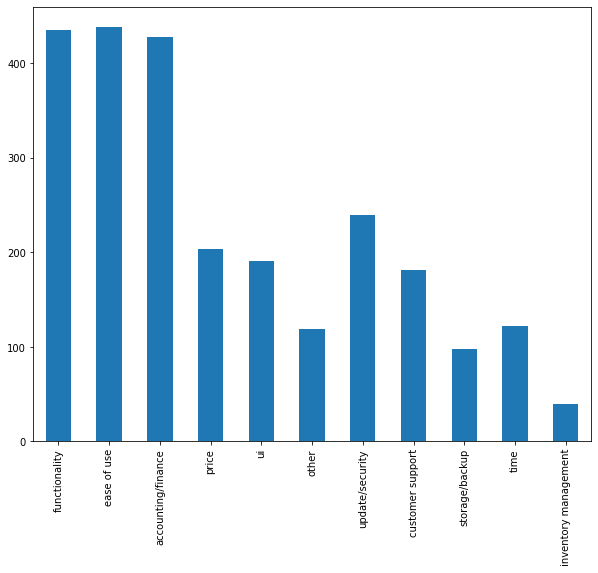

In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

aspect_category_labels.sum(axis=0).plot.bar()

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
pip install pyspellchecker

     |████████████████████████████████| 1.9MB 27kB/s 


In [0]:
from string import punctuation, digits
from nltk.corpus import stopwords
import re
from spellchecker import SpellChecker
import numpy as np
from keras.utils import to_categorical
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Flatten, Softmax
from sklearn import preprocessing
from keras.models import Sequential
from keras.optimizers import Adam

def extract_data_from_dict(df):
    sentence_list = []
    
    for i in range(len(df)):
        sentence_list.append(df['Review'][i])
        
    return sentence_list


def remove_punctuation(s):
    list_punctuation = list(punctuation)
    for i in list_punctuation:
        s = s.replace(i, '')
    return s


stop_words = set(stopwords.words('english') + ['a', 'doesnt', 'dont'])


def clean_sentence(sentence):
    spell = SpellChecker()
    sentence = sentence.lower()
    # remove multiple repeat non num-aplha char !!!!!!!!!-->!
    sentence = re.sub(r'(\W)\1{2,}', r'\1', sentence)
    # removes alpha char repeating more than twice aaaa->aa
    sentence = re.sub(r'(\w)\1{2,}', r'\1\1', sentence)
    # removes links
    sentence = re.sub(r'(?P<url>https?://[^\s]+)', r'', sentence)
    # remove @usernames
    sentence = re.sub(r"\@(\w+)", "", sentence)
    # removing stock names to see if it helps
    sentence = re.sub(r"(?:\$|https?\://)\S+", "", sentence)
    # remove # from #tags
    sentence = sentence.replace('#', '')
    sentence = sentence.replace("'s", '')
    sentence = sentence.replace("-", ' ')
    sentence = sentence.replace("€", '')
    sentence = sentence.replace("¢", '')
    sentence = sentence.replace("™", '')
    sentence = sentence.replace("â", '')
    sentence = sentence.replace("œ", '')

    #     print(sentence)
    # split into tokens by white space
    tokens = sentence.split()
    # remove punctuation from each token
    tokens = [remove_punctuation(w) for w in tokens]
    #     print(tokens)
    #     remove remaining tokens that are not alphabetic
    #     tokens = [word for word in tokens if word.isalpha()]
    # no removing non alpha words to keep stock names($ZSL)
    # filter out stop words

    #     for w in stop_words:
    #         print(w)
    #     print(tokens)
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 2]
    #     print(tokens)
    remove_digits = str.maketrans('', '', digits)
    #     print(tokens)
    tokens = [w.translate(remove_digits) for w in tokens]
    tokens = [w.strip() for w in tokens]
    tokens = [w for w in tokens if w != ""]
    tokens = [spell.correction(w) for w in tokens]
    # print('len1'+str(len(tokens)))
    tokens = [w for w in tokens if not w in stop_words]
    # print(len(tokens))
    tokens = ' '.join(tokens)
    return tokens


def convert_lables(trainY, testY, no_of_classes):
    le = preprocessing.LabelEncoder()
    le.fit(trainY+testY)
    temp1 = le.transform(trainY)
    temp2 = le.transform(testY)
    return to_categorical(temp1, no_of_classes), temp2, le.classes_


def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer


# encode a list of lines
def encode_text(tokenizer, lines, length):
    encoded = tokenizer.texts_to_sequences(lines)
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded


def load_word2vec(file_name):
    return KeyedVectors.load_word2vec_format(file_name, binary=True)


def get_embedding_matrix(model, tokenizer, vocab_size, emb_size):
    embedding_matrix = np.zeros((vocab_size, emb_size))
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = model[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix




In [0]:
sentence = extract_data_from_dict(df)

In [0]:
sentence = [clean_sentence(x) for x in sentence]

In [0]:
y= aspect_category_labels.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sentence, y, test_size=0.20, random_state=42)

max len =  137


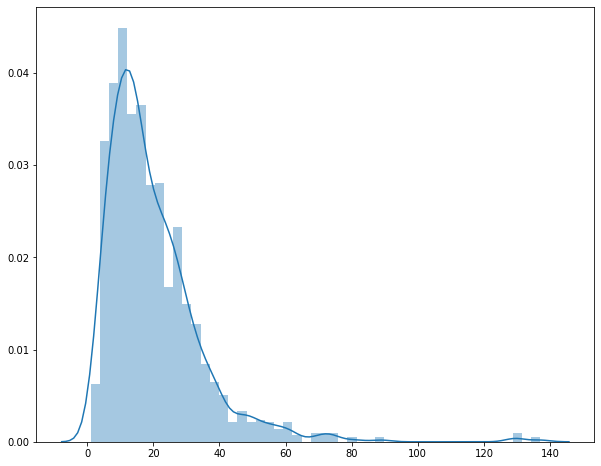

In [23]:
lengths = np.array([len(s.split()) for s in sentence])
print('max len = ',max(lengths))
sns.distplot(lengths)

In [24]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# encode a list of lines
def encode_text(tokenizer, lines, length):
    encoded = tokenizer.texts_to_sequences(lines)
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded
def convert_lables(trainY,testY):
    le = preprocessing.LabelEncoder()
    le.fit(trainY+testY)
    temp1 = le.transform(trainY)
    return to_categorical(temp1,no_of_classes),le.classes_
#loading Google Word2Vec
def load_google_word2vec(file_name):
    return KeyedVectors.load_word2vec_format(file_name, binary=True)
def get_word2vec_embedding_matrix(model):
    embedding_matrix = np.zeros((vocab_size,300))
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = model[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector
    return embedding_matrix
word2vec_model= load_google_word2vec('/content/drive/My Drive/google vector/GoogleNews-vectors-negative300.bin.gz')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#iteration1
#max_length=46(as we got max accuracy&f1score in one aspect extraction)
#learning_rate= 0.0063

In [0]:
max_length=46
no_of_classes=11

In [0]:
tokenizer = create_tokenizer(X_train)
vocab_size = len(tokenizer.word_index) + 1
trainX = encode_text(tokenizer, X_train, max_length)

In [0]:
embedding_matrix_word2vec = get_word2vec_embedding_matrix(word2vec_model)

In [29]:
em='embedding_matrix_word2vec'
learning_rate = 0.00063
deep_inputs = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, len(eval(em)[0]), weights=[eval(em)], trainable=False)(deep_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(128))(embedding_layer)
dense_layer_1 = Dense(11, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
optimizer=Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 46)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 46, 300)           805500    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               439296    
_________________________________________________________________
dense_1 (Dense)              (None, 11)                2827      
Total params: 1,247,623
Trainable params: 442,123
Non-trainable params: 805,500
_________________________________________________________________
None


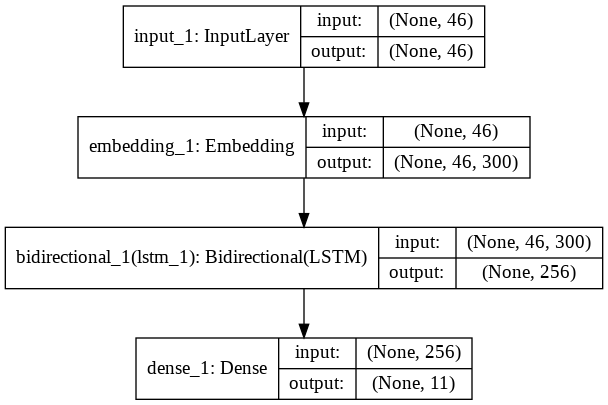

In [30]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)


In [31]:
history = model.fit(np.array(trainX), y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Train on 960 samples, validate on 240 samples
Epoch 1/100
960/960 [==============================] - 5s 6ms/step - loss: 0.5838 - acc: 0.7922 - val_loss: 0.4156 - val_acc: 0.8451
Epoch 2/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3967 - acc: 0.8500 - val_loss: 0.3950 - val_acc: 0.8451
Epoch 3/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3841 - acc: 0.8500 - val_loss: 0.3920 - val_acc: 0.8451
Epoch 4/100
960/960 [==============================] - 4s 4ms/step - loss: 0.3764 - acc: 0.8501 - val_loss: 0.3836 - val_acc: 0.8462
Epoch 5/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3620 - acc: 0.8558 - val_loss: 0.3693 - val_acc: 0.8485
Epoch 6/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3455 - acc: 0.8627 - val_loss: 0.3572 - val_acc: 0.8564
Epoch 7/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3317 - acc: 0.8668 - val_loss: 0.3477 - val_acc: 0.8576
Epoch 8/100
960/960 [==

In [0]:
tokenizer = create_tokenizer(X_test)
vocab_size = len(tokenizer.word_index) + 1
testX = encode_text(tokenizer, X_test, max_length)

In [33]:
score = model.evaluate(np.array(testX), y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])



300/300 [==============================] - 1s 2ms/step
Test Score: 0.9967600297927857
Test Accuracy: 0.8033334016799927


In [0]:
def extract_data_from_test(df):
    sentence_list = []
    
    for i in range(len(df)):
        sentence_list.append(df['Review'][i])
        
    return sentence_list

In [37]:
test_df= pd.read_csv('/content/customer_review_test.csv',encoding='utf8')
test_df.head()

,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2
0,['Banking records do not work seamlessly. Stru...,['accounting method'],['auto update'],[''],0,0.0,NaN
1,['the non choice when an update is made to the...,['ease of use'],[''],[''],0,NaN,NaN
2,['I didn't find payroll module inside zoho boo...,['functionality'],[''],[''],0,NaN,NaN
3,['1. Compared to desktop based and other softw...,['price'],['security'],[''],0,0.0,NaN
4,['sometime the navigation is a little bit conf...,['functionality'],['ui'],[''],0,0.0,NaN


In [38]:
test_df['aspect category'].value_counts()

['accounting method']       75
['functionality']           66
['price']                   41
['none']                    31
['ease of use']             27
['other']                   25
['time']                    17
['auto update']             17
['ui']                      17
['customer support']        15
['backup']                   8
['update']                   6
['inventory management']     4
['security']                 3
['storage']                  2
Name: aspect category, dtype: int64

In [0]:
test_df['ac_test']=test_df['aspect category'].map(lambda x: "['other']" if x == "['none']" else x)
test_df['ac_test']=test_df['ac_test'].map(lambda x: "['storage/backup']" if x in ["['storage']", "['backup']" ] else x)
test_df['ac_test']=test_df['ac_test'].map(lambda x: "['update/security']" if x in ["['auto update']", "['security']", "['update']" ] else x)
test_df['ac_test']=test_df['ac_test'].map(lambda x: "['accounting/finance']" if x in ["['accounting method']", "['financial management']" ] else x)

In [0]:
test_df['ac_test1']=test_df['aspect category1'].map(lambda x: "['other']" if x == "['none']" else x)
test_df['ac_test1']=test_df['ac_test1'].map(lambda x: "['storage/backup']" if x in ["['storage']", "['backup']" ] else x)
test_df['ac_test1']=test_df['ac_test1'].map(lambda x: "['update/security']" if x in ["['auto update']", "['security']", "['update']" ] else x)
test_df['ac_test1']=test_df['ac_test1'].map(lambda x: "['accounting/finance']" if x in ["['accounting method']", "['financial management']" ] else x)

In [0]:
test_df['functionality']=test_df['ac_test'].map(lambda x: "1" if x=="['functionality']" else "0")
test_df['ease of use']=test_df['ac_test'].map(lambda x1: "1" if x1=="['ease of use']" else "0")
test_df['accounting/finance']=test_df['ac_test'].map(lambda x4: "1" if x4=="['accounting/finance']" else "0")
test_df['price']=test_df['ac_test'].map(lambda x6: "1" if x6=="['price']" else "0")
test_df['ui']=test_df['ac_test'].map(lambda x8: "1" if x8=="['ui']" else "0")
test_df['other']=test_df['ac_test'].map(lambda x10: "1" if x10=="['other']" else "0")
test_df['update/security']=test_df['ac_test'].map(lambda x12: "1" if x12=="['update/security']" else "0")
test_df['customer support']=test_df['ac_test'].map(lambda x14: "1" if x14=="['customer support']" else "0")
test_df['storage/backup']=test_df['ac_test'].map(lambda x16: "1" if x16=="['storage/backup']" else "0")

test_df['time']=test_df['ac_test'].map(lambda x18: "1" if x18=="['time']" else "0")
test_df['inventory management']=test_df['ac_test'].map(lambda x20: "1" if x20=="['inventory management']" else "0")

In [42]:
for i in range(len(test_df)):
  if test_df['ac_test1'][i]=="['ease of use']":
    test_df['ease of use'][i]=1
  if test_df['ac_test1'][i]=="['functionality']":
    test_df['functionality'][i]=1
  if test_df['ac_test1'][i]=="['accounting/finance']":
    test_df['accounting/finance'][i]=1
  if test_df['ac_test1'][i]=="['price']":
    test_df['price'][i]=1
  if test_df['ac_test1'][i]=="['ui']":
    test_df['ui'][i]=1
  if test_df['ac_test1'][i]=="['other']":
    test_df['other'][i]=1
  if test_df['ac_test1'][i]=="['update/security']":
    test_df['update/security'][i]=1
  if test_df['ac_test1'][i]=="['customer support']":
    test_df['customer support'][i]=1
  if test_df['ac_test1'][i]=="['storage/backup']":
    test_df['storage/backup'][i]=1
  if test_df['ac_test1'][i]=="['time']":
    test_df['time'][i]=1
  if test_df['ac_test1'][i]=="['inventory management']":
    test_df['inventory management'][i]=1    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/li

In [43]:
test_df.head()

,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2,ac_test,ac_test1,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,['Banking records do not work seamlessly. Stru...,['accounting method'],['auto update'],[''],0,0.0,NaN,['accounting/finance'],['update/security'],0,0,1,0,0,0,1,0,0,0,0
1,['the non choice when an update is made to the...,['ease of use'],[''],[''],0,NaN,NaN,['ease of use'],[''],0,1,0,0,0,0,0,0,0,0,0
2,['I didn't find payroll module inside zoho boo...,['functionality'],[''],[''],0,NaN,NaN,['functionality'],[''],1,0,0,0,0,0,0,0,0,0,0
3,['1. Compared to desktop based and other softw...,['price'],['security'],[''],0,0.0,NaN,['price'],['update/security'],0,0,0,1,0,0,1,0,0,0,0
4,['sometime the navigation is a little bit conf...,['functionality'],['ui'],[''],0,0.0,NaN,['functionality'],['ui'],1,0,0,0,1,0,0,0,0,0,0


In [44]:
test_df['ac_test'].value_counts()

['accounting/finance']      75
['functionality']           66
['other']                   56
['price']                   41
['ease of use']             27
['update/security']         26
['time']                    17
['ui']                      17
['customer support']        15
['storage/backup']          10
['inventory management']     4
Name: ac_test, dtype: int64

In [0]:
sentence_test= extract_data_from_test(test_df)

In [0]:
sentence_test= [clean_sentence(x) for x in sentence_test]

In [0]:
tokenizer = create_tokenizer(sentence_test)
vocab_size = len(tokenizer.word_index) + 1
test_X = encode_text(tokenizer,sentence_test, max_length)

In [62]:
test_df

,Review,aspect category,aspect category1,aspect category2,polarity,polarity1,polarity2,ac_test,ac_test1,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,['Banking records do not work seamlessly. Stru...,['accounting method'],['auto update'],[''],0,0.0,NaN,['accounting/finance'],['update/security'],0,0,1,0,0,0,1,0,0,0,0
1,['the non choice when an update is made to the...,['ease of use'],[''],[''],0,NaN,NaN,['ease of use'],[''],0,1,0,0,0,0,0,0,0,0,0
2,['I didn't find payroll module inside zoho boo...,['functionality'],[''],[''],0,NaN,NaN,['functionality'],[''],1,0,0,0,0,0,0,0,0,0,0
3,['1. Compared to desktop based and other softw...,['price'],['security'],[''],0,0.0,NaN,['price'],['update/security'],0,0,0,1,0,0,1,0,0,0,0
4,['sometime the navigation is a little bit conf...,['functionality'],['ui'],[''],0,0.0,NaN,['functionality'],['ui'],1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,['When you start to use an app like this you h...,['accounting method'],['ease of use'],[''],1,0.0,NaN,['accounting/finance'],['ease of use'],0,1,1,0,0,0,0,0,0,0,0
350,"['Before FreshBooks, I used Toggl and really l...",['other'],[''],[''],1,NaN,NaN,['other'],[''],0,0,0,0,0,1,0,0,0,0,0
351,['It's all good---genuinely a terrific softwar...,['none'],[''],[''],1,NaN,NaN,['other'],[''],0,0,0,0,0,1,0,0,0,0,0
352,['Could be a little less expensive for the low...,['price'],['time'],[''],0,1.0,NaN,['price'],['time'],0,0,0,1,0,0,0,0,0,1,0


In [73]:
category_labels_test1 = test_df[["functionality", "ease of use", "accounting/finance", "price", "ui", "other", "update/security", "customer support", "storage/backup", "time", "inventory management"]]
category_labels_test1.head()

,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0


In [74]:
category_labels_test1

,functionality,ease of use,accounting/finance,price,ui,other,update/security,customer support,storage/backup,time,inventory management
0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
349,0,1,1,0,0,0,0,0,0,0,0
350,0,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0,0,1,0,0,0,0,0
352,0,0,0,1,0,0,0,0,0,1,0


In [0]:
category_labels_test1=category_labels_test1.astype(int)

In [76]:
score = model.evaluate(np.array(test_X), category_labels_test1, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

354/354 [==============================] - 1s 2ms/step
Test Score: 0.9809443620638659
Test Accuracy: 0.8156137466430664


In [0]:
model.save('aspect_model_multi_label.h5')